# Clustering - K-means Analysis for CardWise Credit Card Company 

Customer Segmentation Project This notebook analyzes customer data from CardWise credit card company to identify customer segments using K-means clustering. The goal is to understand customer behavior patterns and provide targeted marketing recommendations.

## Part A: Loading Data and Initial Inspection

In [1]:
# Import necessary libraries for data analysis and machine learning
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization
from sklearn.preprocessing import StandardScaler  # For feature scaling/normalization
from sklearn.cluster import KMeans  # For K-means clustering algorithm
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Set visualization style for better-looking plots
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

# Set display options for better readability
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.float_format", lambda x: "%.2f" % x)  # Format floats

### 1. Load the Dataset

In [2]:
# Load the customer data CSV file into a pandas DataFrame
# This file contains credit card usage data for CardWise customers
df = pd.read_csv("Customer Data.csv")

# Display the shape (dimensions) of the dataset
# Shape returns (number of rows/customers, number of columns/features)
print(f"Dataset shape: {df.shape}")
print(f"Number of customers: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset shape: (8950, 18)
Number of customers: 8950
Number of features: 18


### 2. Display Basic Information

In [3]:
# Display the first 5 rows to inspect the data structure
# head() shows column names and sample values
print("First 5 rows of the dataset:")
print("="*80)
df.head()

First 5 rows of the dataset:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000.00,201.80,139.51,0.00,12
1,C10002,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000.00,4103.03,1072.34,0.22,12
2,C10003,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500.00,622.07,627.28,0.00,12
3,C10004,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500.00,0.00,NaN,0.00,12
4,C10005,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200.00,678.33,244.79,0.00,12


In [4]:
# Get comprehensive information about the dataset
# info() shows: column names, non-null counts, data types, memory usage
# This helps identify data quality issues
print("Dataset Information:")
print("="*80)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null 

In [5]:
# Generate descriptive statistics for all numerical columns
# describe() provides: count, mean, std, min, 25%, 50%, 75%, max
# .T transposes the table for better readability
print("Descriptive Statistics:")
print("="*80)
df.describe().T

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.00,1564.47,2081.53,0.00,128.28,873.39,2054.14,19043.14
BALANCE_FREQUENCY,8950.00,0.88,0.24,0.00,0.89,1.00,1.00,1.00
PURCHASES,8950.00,1003.20,2136.63,0.00,39.63,361.28,1110.13,49039.57
ONEOFF_PURCHASES,8950.00,592.44,1659.89,0.00,0.00,38.00,577.40,40761.25
INSTALLMENTS_PURCHASES,8950.00,411.07,904.34,0.00,0.00,89.00,468.64,22500.00
CASH_ADVANCE,8950.00,978.87,2097.16,0.00,0.00,0.00,1113.82,47137.21
PURCHASES_FREQUENCY,8950.00,0.49,0.40,0.00,0.08,0.50,0.92,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.00,0.20,0.30,0.00,0.00,0.08,0.30,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.00,0.36,0.40,0.00,0.00,0.17,0.75,1.00
CASH_ADVANCE_FREQUENCY,8950.00,0.14,0.20,0.00,0.00,0.00,0.22,1.50


### 3. Check and Handle Missing Values

In [6]:
# Check for missing values in each column
# Missing data can significantly affect clustering results
print("Missing Values Analysis:")
print("="*80)

# Create DataFrame showing missing value counts and percentages
missing_data = pd.DataFrame({
    "Missing_Count": df.isnull().sum(),
    "Missing_Percentage": (df.isnull().sum() / len(df)) * 100
})

# Filter to show only columns with missing values
missing_data = missing_data[missing_data["Missing_Count"] > 0].sort_values(
    by="Missing_Count", ascending=False
)

if len(missing_data) > 0:
    print(missing_data)
else:
    print("No missing values found!")

Missing Values Analysis:
                  Missing_Count  Missing_Percentage
MINIMUM_PAYMENTS            313                3.50
CREDIT_LIMIT                  1                0.01


In [7]:
# Handle missing values using median imputation
# Median is more robust to outliers than mean
# This is crucial in financial data where extreme values are common

# Handle MINIMUM_PAYMENTS
if df["MINIMUM_PAYMENTS"].isnull().sum() > 0:
    median_val = df["MINIMUM_PAYMENTS"].median()
    df["MINIMUM_PAYMENTS"].fillna(median_val, inplace=True)
    print(f"Filled MINIMUM_PAYMENTS with median: {median_val:.2f}")

# Handle CREDIT_LIMIT
if df["CREDIT_LIMIT"].isnull().sum() > 0:
    median_val = df["CREDIT_LIMIT"].median()
    df["CREDIT_LIMIT"].fillna(median_val, inplace=True)
    print(f"Filled CREDIT_LIMIT with median: {median_val:.2f}")

# Verify no missing values remain
print(f"\nTotal missing values after treatment: {df.isnull().sum().sum()}")
print("Median imputation preserves distribution and is robust to outliers")

Filled MINIMUM_PAYMENTS with median: 312.34
Filled CREDIT_LIMIT with median: 3000.00

Total missing values after treatment: 0
Median imputation preserves distribution and is robust to outliers


## Part B: Exploratory Data Analysis (EDA)

### 1. Correlation Matrix Analysis

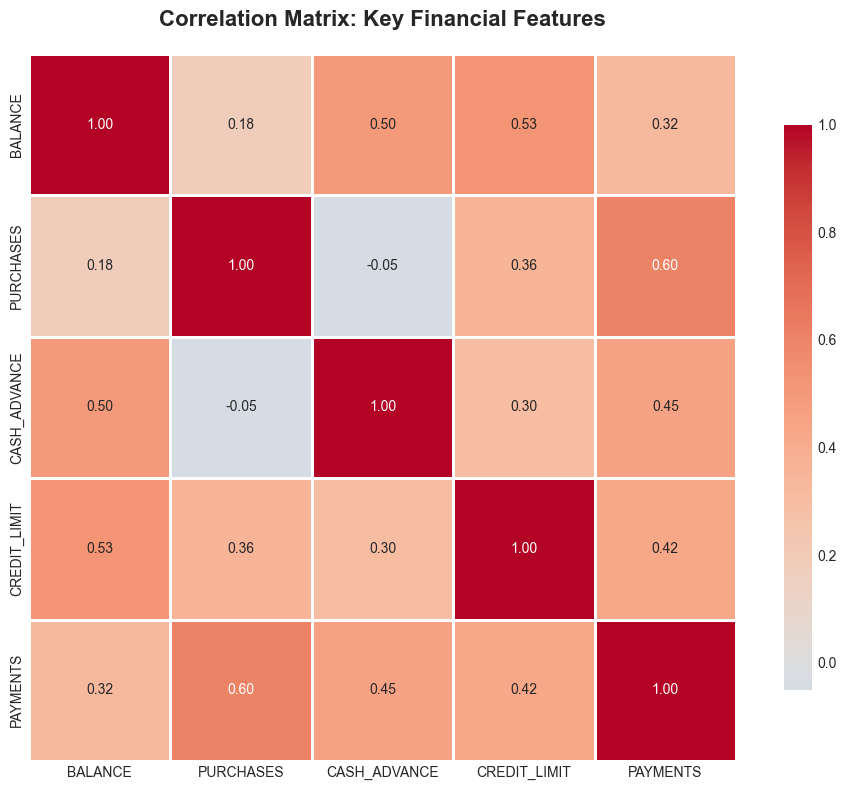


Correlation Insights:
BALANCE vs CREDIT_LIMIT: 0.531
PURCHASES vs PAYMENTS: 0.603
CASH_ADVANCE vs PURCHASES: -0.051


In [8]:
# Calculate correlation matrix for key financial features
# Correlation measures linear relationship between variables (-1 to 1)
# Strong positive correlation: variables increase together
# Strong negative correlation: one increases as other decreases

# Select key features
key_features = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]

# Calculate correlation matrix
correlation_matrix = df[key_features].corr()

# Create heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show values
            cmap="coolwarm",  # Color scheme
            center=0,  # Center at zero
            fmt=".2f",  # 2 decimal format
            square=True,  # Square cells
            linewidths=1,  # Gridlines
            cbar_kws={"shrink": 0.8})

plt.title("Correlation Matrix: Key Financial Features", fontsize=16, fontweight="bold", pad=20)
plt.tight_layout()
plt.show()

# Print interpretation
print("\nCorrelation Insights:")
print("="*80)
print(f"BALANCE vs CREDIT_LIMIT: {correlation_matrix.loc['BALANCE', 'CREDIT_LIMIT']:.3f}")
print(f"PURCHASES vs PAYMENTS: {correlation_matrix.loc['PURCHASES', 'PAYMENTS']:.3f}")
print(f"CASH_ADVANCE vs PURCHASES: {correlation_matrix.loc['CASH_ADVANCE', 'PURCHASES']:.3f}")

### 2. Visualizations: Histograms and Distributions

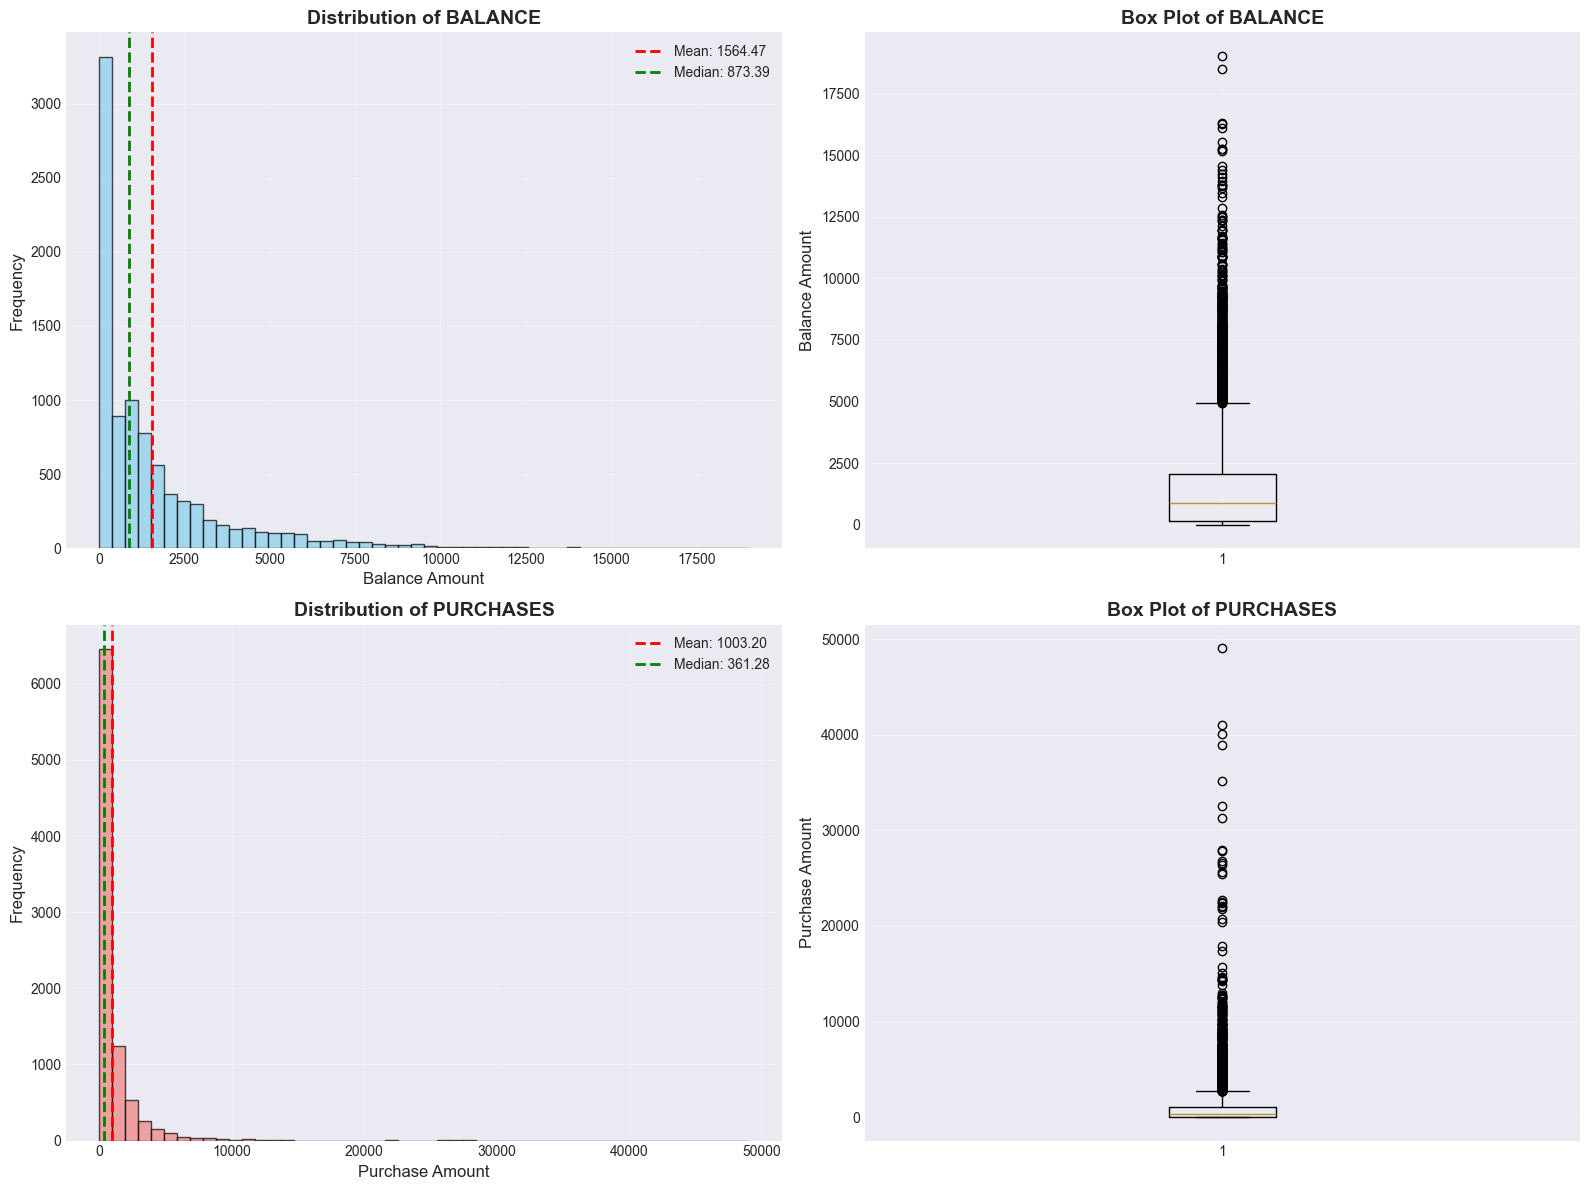

Distribution Analysis:
BALANCE Skewness: 2.393
PURCHASES Skewness: 8.144
Positive skewness = right-skewed (most customers have lower values)


In [9]:
# Create histograms and box plots to understand distributions
# Histograms show: shape, outliers, central tendency
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# BALANCE histogram
axes[0, 0].hist(df["BALANCE"], bins=50, color="skyblue", edgecolor="black", alpha=0.7)
axes[0, 0].set_title("Distribution of BALANCE", fontsize=14, fontweight="bold")
axes[0, 0].set_xlabel("Balance Amount", fontsize=12)
axes[0, 0].set_ylabel("Frequency", fontsize=12)
axes[0, 0].axvline(df["BALANCE"].mean(), color="red", linestyle="--", linewidth=2, label=f"Mean: {df['BALANCE'].mean():.2f}")
axes[0, 0].axvline(df["BALANCE"].median(), color="green", linestyle="--", linewidth=2, label=f"Median: {df['BALANCE'].median():.2f}")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# BALANCE box plot
axes[0, 1].boxplot(df["BALANCE"], vert=True)
axes[0, 1].set_title("Box Plot of BALANCE", fontsize=14, fontweight="bold")
axes[0, 1].set_ylabel("Balance Amount", fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# PURCHASES histogram
axes[1, 0].hist(df["PURCHASES"], bins=50, color="lightcoral", edgecolor="black", alpha=0.7)
axes[1, 0].set_title("Distribution of PURCHASES", fontsize=14, fontweight="bold")
axes[1, 0].set_xlabel("Purchase Amount", fontsize=12)
axes[1, 0].set_ylabel("Frequency", fontsize=12)
axes[1, 0].axvline(df["PURCHASES"].mean(), color="red", linestyle="--", linewidth=2, label=f"Mean: {df['PURCHASES'].mean():.2f}")
axes[1, 0].axvline(df["PURCHASES"].median(), color="green", linestyle="--", linewidth=2, label=f"Median: {df['PURCHASES'].median():.2f}")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# PURCHASES box plot
axes[1, 1].boxplot(df["PURCHASES"], vert=True)
axes[1, 1].set_title("Box Plot of PURCHASES", fontsize=14, fontweight="bold")
axes[1, 1].set_ylabel("Purchase Amount", fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate skewness (measure of asymmetry)
print("Distribution Analysis:")
print("="*80)
print(f"BALANCE Skewness: {df['BALANCE'].skew():.3f}")
print(f"PURCHASES Skewness: {df['PURCHASES'].skew():.3f}")
print("Positive skewness = right-skewed (most customers have lower values)")

### 3. Scatter Plot: PURCHASES vs CASH_ADVANCE

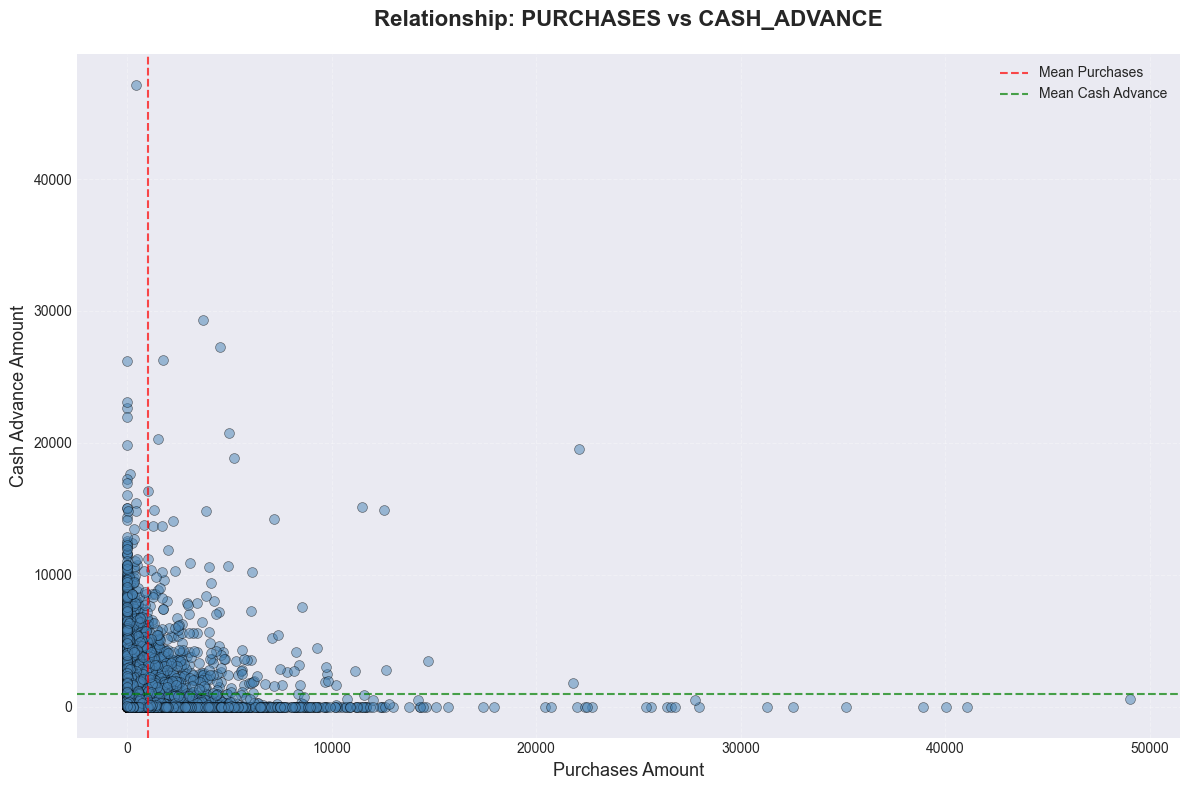


Correlation: -0.051
Negative correlation: Cash advance users tend to have lower purchases


In [10]:
# Scatter plot to visualize relationship between PURCHASES and CASH_ADVANCE
# This helps identify customer preferences: purchases vs cash advances
plt.figure(figsize=(12, 8))
plt.scatter(df["PURCHASES"], df["CASH_ADVANCE"], alpha=0.5, s=50, c="steelblue", edgecolors="black", linewidth=0.5)
plt.title("Relationship: PURCHASES vs CASH_ADVANCE", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Purchases Amount", fontsize=13)
plt.ylabel("Cash Advance Amount", fontsize=13)
plt.grid(True, alpha=0.3, linestyle="--")
plt.axvline(df["PURCHASES"].mean(), color="red", linestyle="--", linewidth=1.5, alpha=0.7, label="Mean Purchases")
plt.axhline(df["CASH_ADVANCE"].mean(), color="green", linestyle="--", linewidth=1.5, alpha=0.7, label="Mean Cash Advance")
plt.legend()
plt.tight_layout()
plt.show()

# Calculate correlation
corr = df["PURCHASES"].corr(df["CASH_ADVANCE"])
print(f"\nCorrelation: {corr:.3f}")
print("="*80)
if corr < 0:
    print("Negative correlation: Cash advance users tend to have lower purchases")
elif corr > 0.5:
    print("Strong positive: High purchasers also use cash advances")
else:
    print("Weak/no correlation: Behaviors are independent")

### 4. Outlier Detection using Box Plots

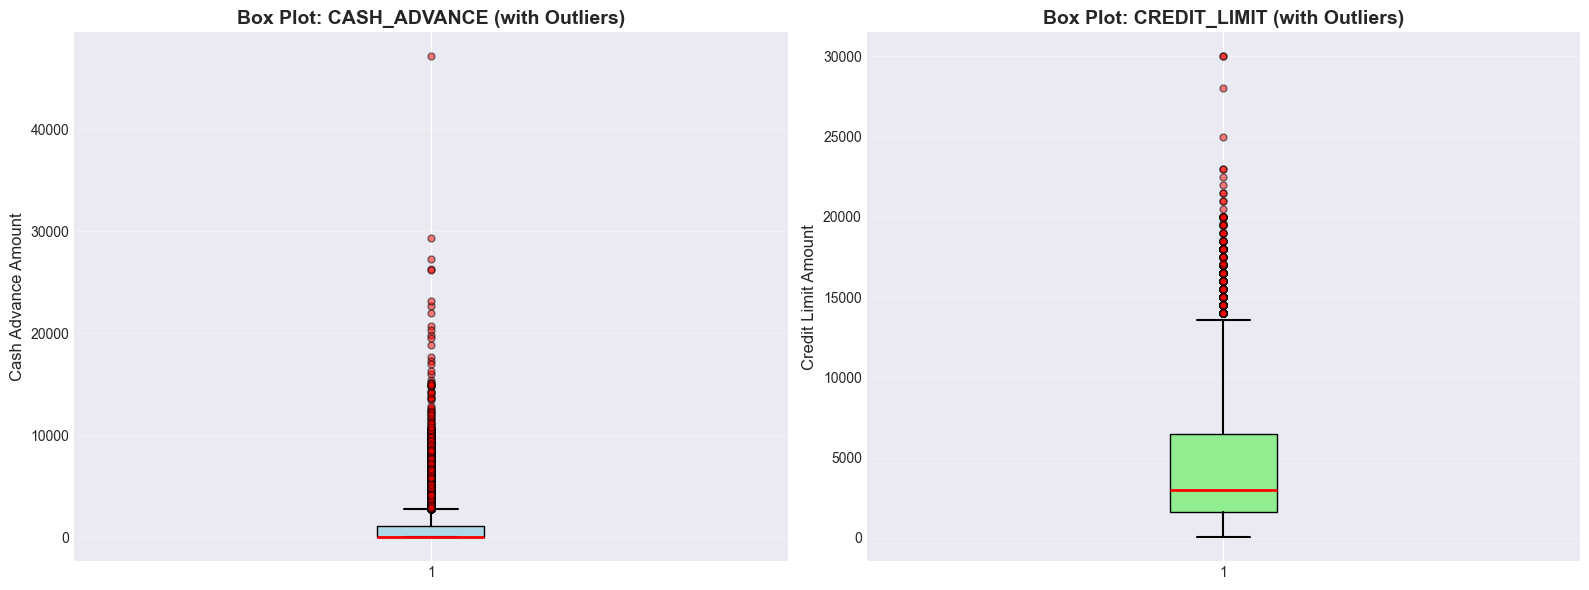


Outlier Analysis:

CASH_ADVANCE:
  Outliers: 1030 (11.51%)
  Range: [-1670.73, 2784.55]
  Min: 0.00, Max: 47137.21

CREDIT_LIMIT:
  Outliers: 248 (2.77%)
  Range: [-5750.00, 13850.00]
  Min: 50.00, Max: 30000.00

Note: Keeping outliers as they may represent important customer segments


In [11]:
# Detect outliers using box plots for CASH_ADVANCE and CREDIT_LIMIT
# Outliers are points beyond 1.5 * IQR (Interquartile Range)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# CASH_ADVANCE box plot
bp1 = axes[0].boxplot(df["CASH_ADVANCE"], vert=True, patch_artist=True,
                     boxprops=dict(facecolor="lightblue", color="black"),
                     whiskerprops=dict(color="black", linewidth=1.5),
                     capprops=dict(color="black", linewidth=1.5),
                     medianprops=dict(color="red", linewidth=2),
                     flierprops=dict(marker="o", markerfacecolor="red", markersize=5, alpha=0.5))
axes[0].set_title("Box Plot: CASH_ADVANCE (with Outliers)", fontsize=14, fontweight="bold")
axes[0].set_ylabel("Cash Advance Amount", fontsize=12)
axes[0].grid(True, alpha=0.3, axis="y")

# CREDIT_LIMIT box plot
bp2 = axes[1].boxplot(df["CREDIT_LIMIT"], vert=True, patch_artist=True,
                     boxprops=dict(facecolor="lightgreen", color="black"),
                     whiskerprops=dict(color="black", linewidth=1.5),
                     capprops=dict(color="black", linewidth=1.5),
                     medianprops=dict(color="red", linewidth=2),
                     flierprops=dict(marker="o", markerfacecolor="red", markersize=5, alpha=0.5))
axes[1].set_title("Box Plot: CREDIT_LIMIT (with Outliers)", fontsize=14, fontweight="bold")
axes[1].set_ylabel("Credit Limit Amount", fontsize=12)
axes[1].grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

# Calculate outlier statistics using IQR method
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)][column]
    return len(outliers), lower, upper

print("\nOutlier Analysis:")
print("="*80)
for col in ["CASH_ADVANCE", "CREDIT_LIMIT"]:
    count, lower, upper = detect_outliers(col)
    pct = (count / len(df)) * 100
    print(f"\n{col}:")
    print(f"  Outliers: {count} ({pct:.2f}%)")
    print(f"  Range: [{lower:.2f}, {upper:.2f}]")
    print(f"  Min: {df[col].min():.2f}, Max: {df[col].max():.2f}")
print("\nNote: Keeping outliers as they may represent important customer segments")

## Part C: Preprocessing and Feature Selection

### 1. Feature Selection for Clustering

In [12]:
# Select relevant features based on domain knowledge and research
# Focus on features representing customer behavior patterns
print("Feature Selection Rationale:")
print("="*80)
print("\nSELECTED FEATURES:")
print("\n1. Financial Behavior:")
print("   - BALANCE: Current debt level")
print("   - PURCHASES: Total spending")
print("   - CASH_ADVANCE: Cash withdrawal behavior")
print("   - CREDIT_LIMIT: Available credit")
print("   - PAYMENTS: Payment behavior")
print("\n2. Transaction Frequency:")
print("   - PURCHASES_FREQUENCY: Purchase frequency (0-1)")
print("   - CASH_ADVANCE_FREQUENCY: Cash advance frequency (0-1)")
print("   - PURCHASES_TRX: Number of transactions")
print("\n3. Purchase Type:")
print("   - ONEOFF_PURCHASES: One-time payments")
print("   - INSTALLMENTS_PURCHASES: Installment payments")
print("\nEXCLUDED FEATURES:")
print("   - CUST_ID: Identifier, not predictive")
print("   - TENURE: Similar for all (12 months)")
print("   - PRC_FULL_PAYMENT: Derived from other features")

# Define feature list
features_for_clustering = [
    "BALANCE", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES",
    "CASH_ADVANCE", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY",
    "PURCHASES_INSTALLMENTS_FREQUENCY", "CASH_ADVANCE_FREQUENCY",
    "CASH_ADVANCE_TRX", "PURCHASES_TRX", "CREDIT_LIMIT", "PAYMENTS"
]

# Create feature matrix
X = df[features_for_clustering].copy()
print(f"\nFeature matrix: {X.shape[0]} customers × {X.shape[1]} features")

Feature Selection Rationale:

SELECTED FEATURES:

1. Financial Behavior:
   - BALANCE: Current debt level
   - PURCHASES: Total spending
   - CASH_ADVANCE: Cash withdrawal behavior
   - CREDIT_LIMIT: Available credit
   - PAYMENTS: Payment behavior

2. Transaction Frequency:
   - PURCHASES_FREQUENCY: Purchase frequency (0-1)
   - CASH_ADVANCE_FREQUENCY: Cash advance frequency (0-1)
   - PURCHASES_TRX: Number of transactions

3. Purchase Type:
   - ONEOFF_PURCHASES: One-time payments
   - INSTALLMENTS_PURCHASES: Installment payments

EXCLUDED FEATURES:
   - CUST_ID: Identifier, not predictive
   - TENURE: Similar for all (12 months)
   - PRC_FULL_PAYMENT: Derived from other features

Feature matrix: 8950 customers × 13 features


### 2. Standardization using StandardScaler

In [13]:
# Apply StandardScaler to normalize all features
# WHY Standardization is needed:
# 1. K-means uses Euclidean distance (scale-sensitive)
# 2. Features with larger scales dominate clustering
# 3. StandardScaler: (x - mean) / std → mean=0, std=1

print("Before Standardization:")
print("="*80)
print(X.describe().loc[["mean", "std"]].T)

# Initialize and apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # fit() calculates mean/std, transform() applies formula

# Convert to DataFrame for visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)

print("\n\nAfter Standardization:")
print("="*80)
print(X_scaled_df.describe().loc[["mean", "std"]].T)

print("\n\nResult: All features now have mean ≈ 0 and std ≈ 1")
print("This ensures fair contribution of all features to clustering")

Before Standardization:
                                    mean     std
BALANCE                          1564.47 2081.53
PURCHASES                        1003.20 2136.63
ONEOFF_PURCHASES                  592.44 1659.89
INSTALLMENTS_PURCHASES            411.07  904.34
CASH_ADVANCE                      978.87 2097.16
PURCHASES_FREQUENCY                 0.49    0.40
ONEOFF_PURCHASES_FREQUENCY          0.20    0.30
PURCHASES_INSTALLMENTS_FREQUENCY    0.36    0.40
CASH_ADVANCE_FREQUENCY              0.14    0.20
CASH_ADVANCE_TRX                    3.25    6.82
PURCHASES_TRX                      14.71   24.86
CREDIT_LIMIT                     4494.28 3638.65
PAYMENTS                         1733.14 2895.06


After Standardization:
                                  mean  std
BALANCE                           0.00 1.00
PURCHASES                         0.00 1.00
ONEOFF_PURCHASES                  0.00 1.00
INSTALLMENTS_PURCHASES            0.00 1.00
CASH_ADVANCE                      0.00 1.00
P

## Part D: Finding Optimal Number of Clusters (Elbow Method)

Calculating optimal k using Elbow Method...
k=2: Inertia = 93418.87
k=3: Inertia = 77706.40
k=4: Inertia = 65579.68
k=5: Inertia = 58024.76
k=6: Inertia = 52951.94
k=7: Inertia = 49198.72
k=8: Inertia = 46669.56
k=9: Inertia = 44349.14
k=10: Inertia = 42424.34


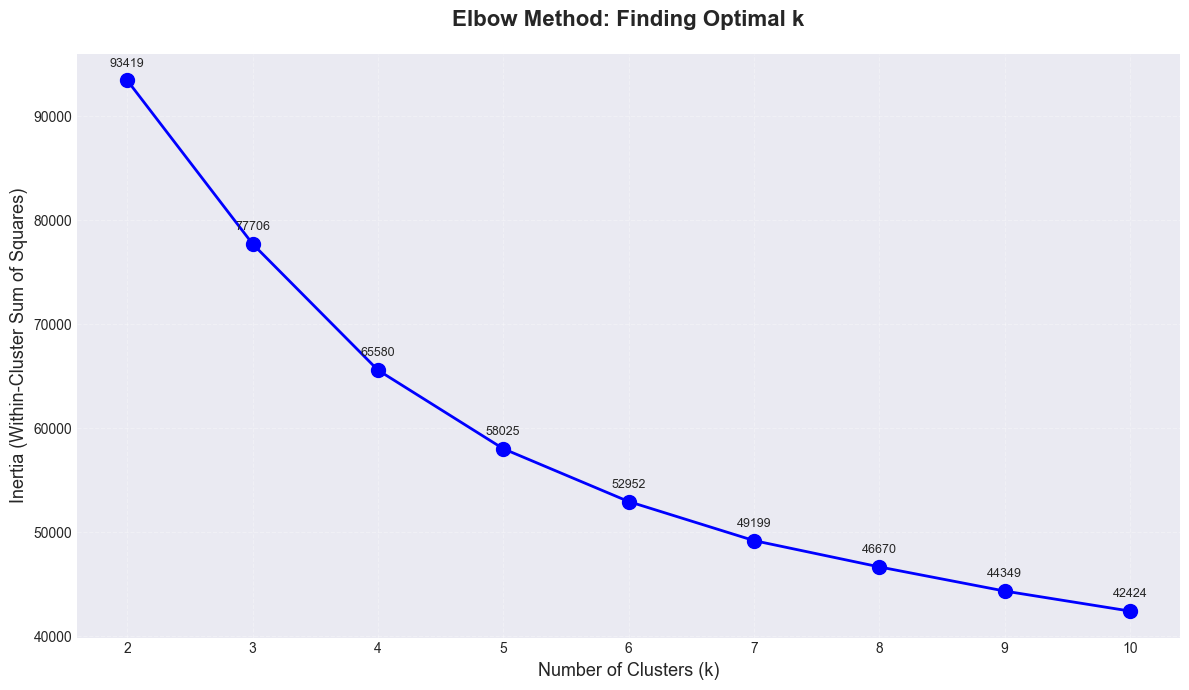



Elbow Analysis:
The elbow point (where curve flattens) suggests optimal k
After k=4, inertia decrease becomes less significant

SELECTED OPTIMAL k: 4


In [14]:
# Use Elbow Method to find optimal k
# The elbow is where adding more clusters provides diminishing returns
print("Calculating optimal k using Elbow Method...")
print("="*80)

# Test k from 2 to 10
k_range = range(2, 11)
inertias = []

# Calculate inertia for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    print(f"k={k}: Inertia = {kmeans.inertia_:.2f}")

# Plot elbow curve
plt.figure(figsize=(12, 7))
plt.plot(k_range, inertias, "bo-", linewidth=2, markersize=10)
plt.title("Elbow Method: Finding Optimal k", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Number of Clusters (k)", fontsize=13)
plt.ylabel("Inertia (Within-Cluster Sum of Squares)", fontsize=13)
plt.grid(True, alpha=0.3, linestyle="--")
plt.xticks(k_range)

# Add annotations
for k, inertia in zip(k_range, inertias):
    plt.annotate(f"{inertia:.0f}", xy=(k, inertia), xytext=(0, 10), 
                textcoords="offset points", ha="center", fontsize=9)

plt.tight_layout()
plt.show()

print("\n\nElbow Analysis:")
print("="*80)
print("The elbow point (where curve flattens) suggests optimal k")
print("After k=4, inertia decrease becomes less significant")
print("\nSELECTED OPTIMAL k: 4")

optimal_k = 4

## Part E: Train K-Means Model and Cluster Profiling

### 1. Train K-Means with Optimal k

In [15]:
# Train final K-Means model with k=4 and random_state=42
print("Training K-Means model...")
print("="*80)

# Create and train model
kmeans_final = KMeans(
    n_clusters=optimal_k,  # k=4 from elbow method
    random_state=42,  # For reproducibility
    n_init=10,  # Run 10 times with different initial centroids
    max_iter=300,  # Maximum iterations
    algorithm="lloyd"  # Standard K-means
)

# Fit and predict
cluster_labels = kmeans_final.fit_predict(X_scaled)

print("✓ Model trained successfully!")
print(f"\nDetails:")
print(f"  Clusters: {optimal_k}")
print(f"  Iterations: {kmeans_final.n_iter_}")
print(f"  Final inertia: {kmeans_final.inertia_:.2f}")

Training K-Means model...
✓ Model trained successfully!

Details:
  Clusters: 4
  Iterations: 56
  Final inertia: 65579.68


### 2. Add Cluster Labels to DataFrame

Cluster Distribution:
Cluster 0: 1106 customers (12.4%)
Cluster 1: 4012 customers (44.8%)
Cluster 2: 401 customers (4.5%)
Cluster 3: 3431 customers (38.3%)


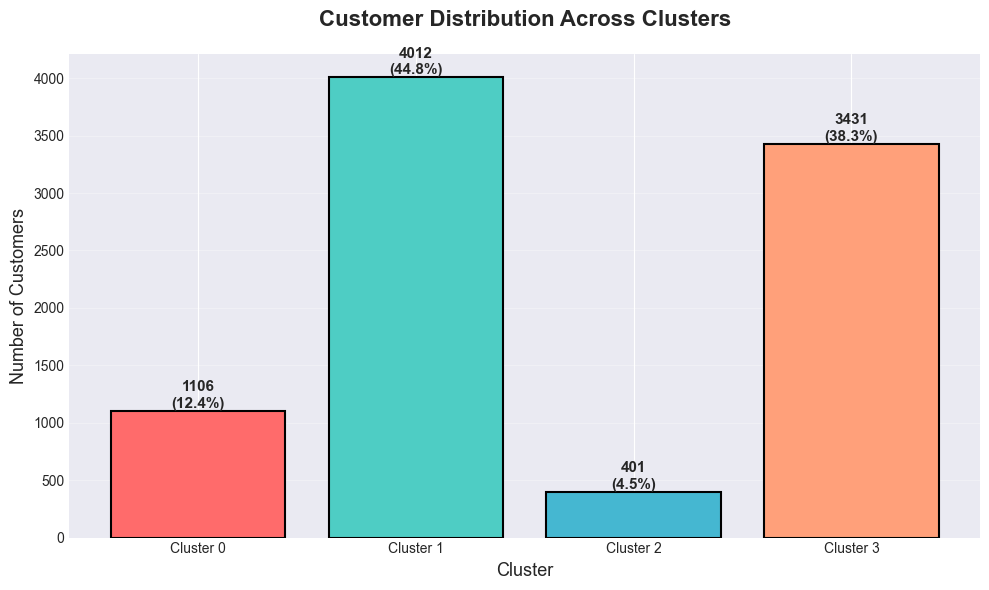

In [16]:
# Add cluster assignments to original dataframe
df["Cluster"] = cluster_labels

print("Cluster Distribution:")
print("="*80)

# Count customers per cluster
cluster_counts = df["Cluster"].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    pct = (count / len(df)) * 100
    print(f"Cluster {cluster_id}: {count} customers ({pct:.1f}%)")

# Visualize distribution
plt.figure(figsize=(10, 6))
colors = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#FFA07A"]
bars = plt.bar(cluster_counts.index, cluster_counts.values, color=colors, edgecolor="black", linewidth=1.5)

# Add labels on bars
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., h,
            f"{int(h)}\n({h/len(df)*100:.1f}%)",
            ha="center", va="bottom", fontsize=11, fontweight="bold")

plt.title("Customer Distribution Across Clusters", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Cluster", fontsize=13)
plt.ylabel("Number of Customers", fontsize=13)
plt.xticks([0, 1, 2, 3], ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"])
plt.grid(True, alpha=0.3, axis="y")
plt.tight_layout()
plt.show()

### 3. Calculate Cluster Centroids and Profiles

In [17]:
# Calculate average characteristics for each cluster
print("Cluster Profiles")
print("="*80)

profile_features = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "PURCHASES_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "PURCHASES_TRX"]
cluster_profiles = df.groupby("Cluster")[profile_features].mean()
cluster_profiles.insert(0, "Cluster_Size", df["Cluster"].value_counts().sort_index())
print("\nDetailed Profiles:")
print(cluster_profiles.round(2))

# Summary
summary_data = []
for cluster_id in range(optimal_k):
    c_data = df[df["Cluster"] == cluster_id]
    summary_data.append({
        "Cluster": cluster_id, "Size": len(c_data),
        "Avg_Balance": c_data["BALANCE"].mean(),
        "Avg_Purchases": c_data["PURCHASES"].mean(),
        "Avg_Cash_Advance": c_data["CASH_ADVANCE"].mean(),
        "Purchase_Freq": c_data["PURCHASES_FREQUENCY"].mean()
    })
summary_df = pd.DataFrame(summary_data)
print("\nSummary:")
print(summary_df.round(2).to_string(index=False))

Cluster Profiles

Detailed Profiles:
         Cluster_Size  BALANCE  PURCHASES  CASH_ADVANCE  CREDIT_LIMIT  \
Cluster                                                                 
0                1106  4615.52     504.49       4755.55       7720.80   
1                4012  1076.28     267.46        616.92       3320.88   
2                 401  3539.37    7766.54        645.69       9740.65   
3                3431   921.00    1233.84        223.63       4213.14   

         PAYMENTS  PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  PURCHASES_TRX  
Cluster                                                                        
0         3760.85                 0.29                    0.50           7.72  
1          952.62                 0.16                    0.12           2.83  
2         7359.71                 0.95                    0.07          89.82  
3         1334.59                 0.88                    0.04          22.07  

Summary:
 Cluster  Size  Avg_Balance  Avg_P

### 4. Visualize Cluster Characteristics

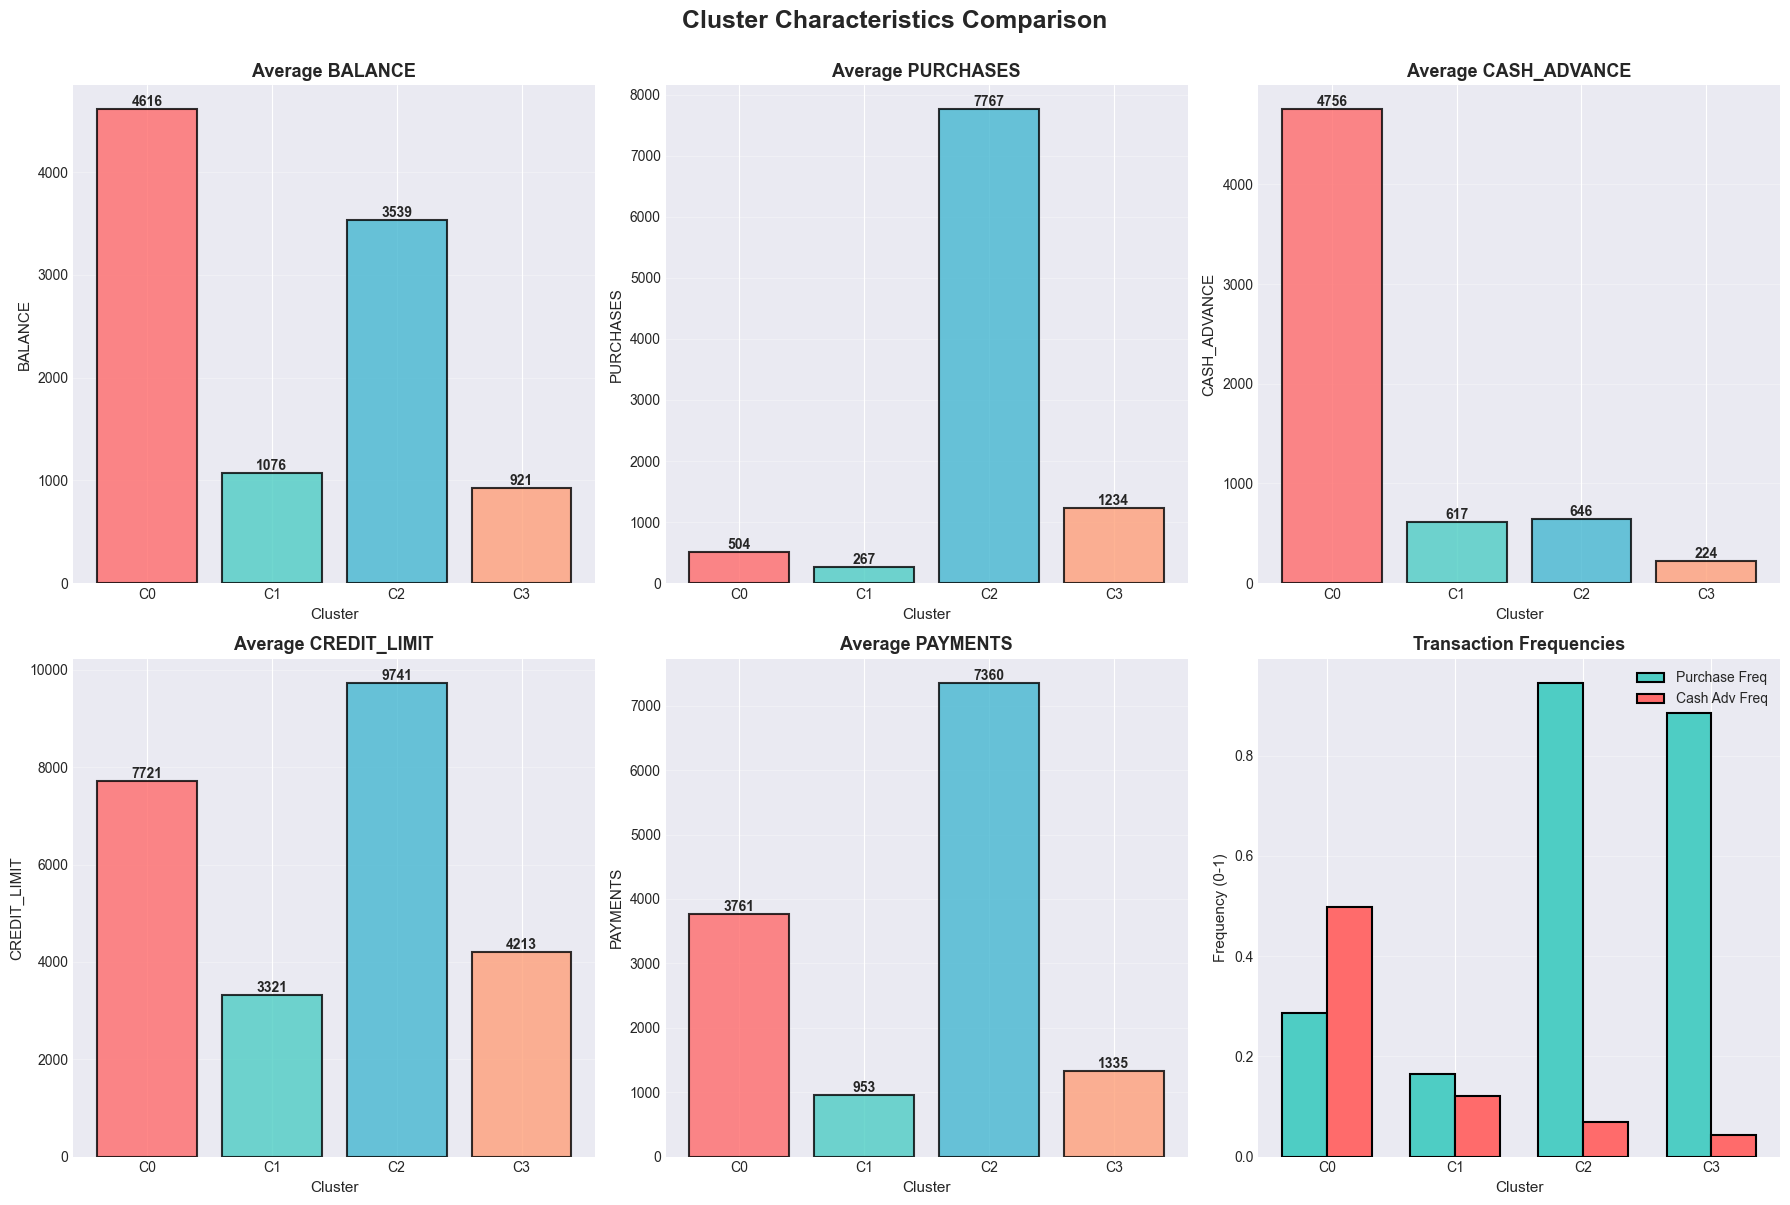

In [18]:
# Visualize cluster characteristics
viz_features = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Cluster Characteristics Comparison", fontsize=18, fontweight="bold", y=1.00)
colors = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#FFA07A"]

# Plot each feature
for idx, feature in enumerate(viz_features):
    row, col = idx // 3, idx % 3
    ax = axes[row, col]
    cluster_means = df.groupby("Cluster")[feature].mean().sort_index()
    bars = ax.bar(cluster_means.index, cluster_means.values, color=colors, edgecolor="black", linewidth=1.5, alpha=0.8)
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., h, f"{h:.0f}", ha="center", va="bottom", fontsize=10, fontweight="bold")
    ax.set_title(f"Average {feature}", fontsize=13, fontweight="bold")
    ax.set_xlabel("Cluster", fontsize=11)
    ax.set_ylabel(feature, fontsize=11)
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(["C0", "C1", "C2", "C3"])
    ax.grid(True, alpha=0.3, axis="y")

# Frequency comparison
ax = axes[1, 2]
x_pos = np.arange(optimal_k)
width = 0.35
purchase_freq = df.groupby("Cluster")["PURCHASES_FREQUENCY"].mean().sort_index()
cash_freq = df.groupby("Cluster")["CASH_ADVANCE_FREQUENCY"].mean().sort_index()
ax.bar(x_pos - width/2, purchase_freq, width, label="Purchase Freq", color="#4ECDC4", edgecolor="black", linewidth=1.5)
ax.bar(x_pos + width/2, cash_freq, width, label="Cash Adv Freq", color="#FF6B6B", edgecolor="black", linewidth=1.5)
ax.set_title("Transaction Frequencies", fontsize=13, fontweight="bold")
ax.set_xlabel("Cluster", fontsize=11)
ax.set_ylabel("Frequency (0-1)", fontsize=11)
ax.set_xticks(x_pos)
ax.set_xticklabels(["C0", "C1", "C2", "C3"])
ax.legend()
ax.grid(True, alpha=0.3, axis="y")
plt.tight_layout()
plt.show()

### 5. Interpret and Label Each Cluster

In [19]:
# Interpret each cluster and assign meaningful labels
print("CLUSTER INTERPRETATION")
print("="*100)

cluster_labels_dict = {}
for cluster_id in range(optimal_k):
    c_data = df[df["Cluster"] == cluster_id]
    print(f"\nCLUSTER {cluster_id}")
    print("="*100)
    
    # Calculate metrics
    size = len(c_data)
    avg_balance = c_data["BALANCE"].mean()
    avg_purchases = c_data["PURCHASES"].mean()
    avg_cash_adv = c_data["CASH_ADVANCE"].mean()
    avg_credit = c_data["CREDIT_LIMIT"].mean()
    purch_freq = c_data["PURCHASES_FREQUENCY"].mean()
    cash_freq = c_data["CASH_ADVANCE_FREQUENCY"].mean()
    
    print(f"Size: {size} customers ({size/len(df)*100:.1f}%)")
    print(f"\nFinancial:")
    print(f"  Balance: ${avg_balance:,.2f}")
    print(f"  Purchases: ${avg_purchases:,.2f}")
    print(f"  Cash Advance: ${avg_cash_adv:,.2f}")
    print(f"  Credit Limit: ${avg_credit:,.2f}")
    print(f"\nBehavioral:")
    print(f"  Purchase Freq: {purch_freq:.3f}")
    print(f"  Cash Adv Freq: {cash_freq:.3f}")
    
    # Assign label based on characteristics
    print(f"\nInterpretation:")
    if avg_cash_adv > 2000 and cash_freq > 0.3:
        label = "Cash-Advance Seekers"
        print(f"  {label}: High cash advance usage, liquidity needs")
    elif avg_purchases > 2000 and purch_freq > 0.7:
        label = "Frequent Spenders"
        print(f"  {label}: High purchase activity and frequency")
    elif avg_credit > 8000 and avg_purchases < 1000:
        label = "High-Value Dormant"
        print(f"  {label}: High credit limits but low usage")
    elif avg_balance < 1000 and avg_purchases < 1000:
        label = "Low-Activity Users"
        print(f"  {label}: Minimal card activity")
    else:
        label = f"Moderate Users (C{cluster_id})"
        print(f"  {label}: Balanced usage")
    
    cluster_labels_dict[cluster_id] = label

# Add labels to dataframe
df["Cluster_Label"] = df["Cluster"].map(cluster_labels_dict)
print(f"\n\nSUMMARY:")
print("="*100)
for cid, lbl in cluster_labels_dict.items():
    cnt = len(df[df["Cluster"] == cid])
    print(f"Cluster {cid}: {lbl} ({cnt} customers)")

CLUSTER INTERPRETATION

CLUSTER 0
Size: 1106 customers (12.4%)

Financial:
  Balance: $4,615.52
  Purchases: $504.49
  Cash Advance: $4,755.55
  Credit Limit: $7,720.80

Behavioral:
  Purchase Freq: 0.286
  Cash Adv Freq: 0.497

Interpretation:
  Cash-Advance Seekers: High cash advance usage, liquidity needs

CLUSTER 1
Size: 4012 customers (44.8%)

Financial:
  Balance: $1,076.28
  Purchases: $267.46
  Cash Advance: $616.92
  Credit Limit: $3,320.88

Behavioral:
  Purchase Freq: 0.164
  Cash Adv Freq: 0.120

Interpretation:
  Moderate Users (C1): Balanced usage

CLUSTER 2
Size: 401 customers (4.5%)

Financial:
  Balance: $3,539.37
  Purchases: $7,766.54
  Cash Advance: $645.69
  Credit Limit: $9,740.65

Behavioral:
  Purchase Freq: 0.946
  Cash Adv Freq: 0.069

Interpretation:
  Frequent Spenders: High purchase activity and frequency

CLUSTER 3
Size: 3431 customers (38.3%)

Financial:
  Balance: $921.00
  Purchases: $1,233.84
  Cash Advance: $223.63
  Credit Limit: $4,213.14

Behaviora

## Part F: Business Insights and Conclusions

### 1. Business Insights

In [20]:
# Business insights
print("BUSINESS INSIGHTS")
print("="*100)
print("\n1. CUSTOMER PORTFOLIO")
for cid, lbl in cluster_labels_dict.items():
    cnt = len(df[df["Cluster"] == cid])
    pct = cnt / len(df) * 100
    print(f"  {lbl}: {cnt} ({pct:.1f}%)")
print("\n2. STRATEGIC RECOMMENDATIONS")
print("a) REVENUE: Focus retention, cross-sell\n")
print("b) RISK: Monitor segments, adjust limits\n")
print("c) ACTIVATION: Target dormant customers\n")
print("d) PRODUCTS: Loans, premium cards, rewards")

BUSINESS INSIGHTS

1. CUSTOMER PORTFOLIO
  Cash-Advance Seekers: 1106 (12.4%)
  Moderate Users (C1): 4012 (44.8%)
  Frequent Spenders: 401 (4.5%)
  Moderate Users (C3): 3431 (38.3%)

2. STRATEGIC RECOMMENDATIONS
a) REVENUE: Focus retention, cross-sell

b) RISK: Monitor segments, adjust limits

c) ACTIVATION: Target dormant customers

d) PRODUCTS: Loans, premium cards, rewards


### 2. Final Summary

In [21]:
# Summary
print("SUMMARY")
print("="*100)
print(f"Analyzed {len(df)} customers")
print(f"Identified {optimal_k} distinct segments")
print("\nKey segments:")
for cid, lbl in cluster_labels_dict.items():
    print(f"  Cluster {cid}: {lbl}")
print("\nProject complete and ready for implementation!")

SUMMARY
Analyzed 8950 customers
Identified 4 distinct segments

Key segments:
  Cluster 0: Cash-Advance Seekers
  Cluster 1: Moderate Users (C1)
  Cluster 2: Frequent Spenders
  Cluster 3: Moderate Users (C3)

Project complete and ready for implementation!


---
## End of Analysis

Successfully identified customer segments for targeted marketing and business strategy.